# Problem Statement

We need to categorize our purchased items, we know them as a text in multilingual form.

Let's dig into this notebook to see how to solve this challengs 🧐

first will set my environment

# Setting up the environment

In [8]:
%pip install langdetect

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 981 kB 864 kB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=89643238ea4a19bacfd41ef6dbbd9e7e9e0c1de9433dc041c77d87564309bea8
  Stored in directory: /Users/nadamakram/Library/Caches/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --quiet deep-translator

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install --quiet langchain-community

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install --quiet langchain-huggingface

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install --upgrade --quiet huggingface_hub

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
docling 2.8.1 requires pydantic<2.10,>=2.0.0, but you have pydantic 2.10.6 which is incompatible.


In [5]:
%pip install --quiet langchain-ollama

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from deep_translator import GoogleTranslator
from langdetect import detect
from langsmith import traceable
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns 

load_dotenv()

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
LANGSMITH_TRACING = os.getenv('LANGSMITH_TRACING')
LANGSMITH_API_KEY = os.getenv('LANGSMITH_API_KEY')

# Data

typical data loading and will look closer to the columns.. 

In [8]:
df = pd.read_excel('./data/purchase-order-items.xlsx', engine='openpyxl')

In [9]:
df

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN


Certainly the Item Name column will need most of the work but I'd like to do some EDA for the rest of the columns first..

## EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Item Name          2910 non-null   object 
 2   Quantity           3150 non-null   float64
 3   Total Bcy          3150 non-null   float64
 4   Sub Total Bcy      3150 non-null   float64
 5   Purchase Order ID  3150 non-null   int64  
 6   Product ID         2910 non-null   float64
 7   Currency Code      3150 non-null   object 
 8   Account ID         3150 non-null   int64  
 9   Tax ID             3085 non-null   float64
 10  Project ID         0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 270.8+ KB


In [12]:
# since Project ID is all missing
df = df.drop('Project ID', axis=1)

In [ ]:
print(f"The number of unique Item IDs is: {len(df['Item ID'].unique())}")

The number of unique Item IDs is: 3150


### Currency column

In [ ]:
print(df['Currency Code'].value_counts())

Currency Code
SAR    3085
USD      65
Name: count, dtype: int64


### Bcy columns

In [ ]:
(df["Total Bcy"] == df["Sub Total Bcy"]).all()

False

In [ ]:
Bcy = df[df["Total Bcy"] != df["Sub Total Bcy"]][['Total Bcy','Sub Total Bcy']]

In [ ]:
df[df["Total Bcy"] == df["Sub Total Bcy"]]['Currency Code'].value_counts()

,count
Currency Code,
SAR,3070
USD,65


In [ ]:
df[df["Total Bcy"] < df["Sub Total Bcy"]]['Currency Code'].value_counts()

,count
Currency Code,
SAR,15


In [ ]:
# group by 'Currency Code' and get the sum of 'Sub Total Bcy' and 'Total Bcy'
df.groupby('Currency Code').agg({'Sub Total Bcy': 'sum', 'Total Bcy': 'sum'})


,Sub Total Bcy,Total Bcy
Currency Code,,
SAR,1.515562e+08,1.515500e+08
USD,1.347573e+06,1.347573e+06


So, we have 2 conditions:

1. Sub Total Bcy and Total Bcy are equal in all USD and most of SAR	(3070 transaction)
2. Sub Total Bcy is greater than Total Bcy is minority in SAR

That likely means:

- For all USD transactions and most SAR transactions, Sub Total Bcy == Total Bcy. This suggests that in these cases, no additional deductions (like taxes, discounts, or fees) are applied.
- For a minority of SAR transactions, Sub Total Bcy > Total Bcy, meaning something (like a discount or adjustment) reduces the total from the subtotal.

We can explore this further by checking the taxes but we only have the Tax ID column.

For future modeling we can use only 1 column of them to avoid multicollinearity and redundancy.

### Quantity

count     3150.000000
mean       475.470797
std       2737.024475
min          0.150000
25%          7.000000
50%         30.000000
75%        130.000000
max      70000.000000
Name: Quantity, dtype: float64


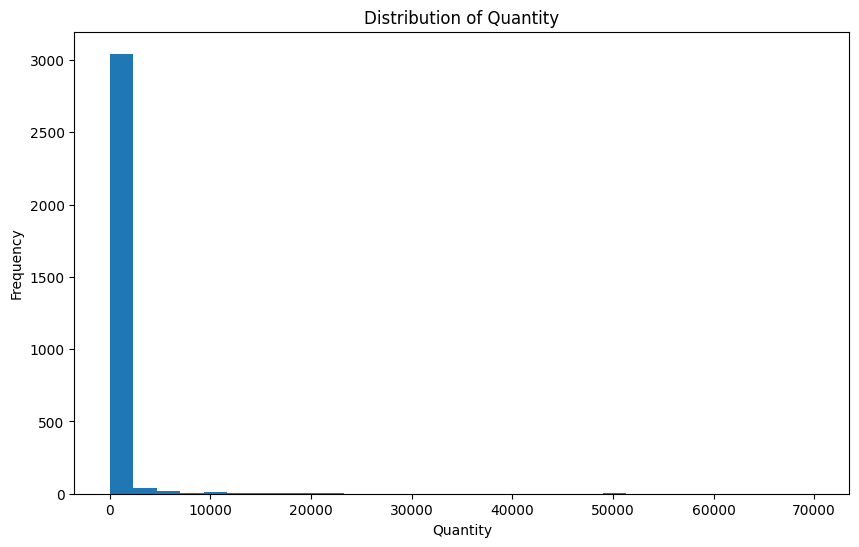

Number of zero quantities: 0
Number of negative quantities: 0


In [18]:
# prompt: explore Quantity	column

# Explore the 'Quantity' column
print(df['Quantity'].describe())
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

print(f"Number of zero quantities: {len(df[df['Quantity'] == 0])}")
print(f"Number of negative quantities: {len(df[df['Quantity'] < 0])}")


In [50]:
df['Quantity'] = df['Quantity'].round()

# Item Name

I will translate the arabic text

In [19]:
df['Item Name'].value_counts()

Item Name
حديد سابك 16 ملم 12 م               13
حديد تسليح اتفاق 14مم 12متر         11
حديد تسليح اتفاق 16مم 12متر         11
حديد تسليح اتفاق 20مم 12متر         11
حديد تسليح سابك مسحوب 6 متر 8 مم     9
                                    ..
lra 93                               1
قزاز 58 شمعه ابيض                    1
تيمر مكيف                            1
فيست جاكت                            1
ITTIFAQ STEEL 12mm, 12 meter         1
Name: count, Length: 2302, dtype: int64

In [24]:
def detect_language(text):
    try:
        results = detect(text)
        return results
    except:
        return "unknown"

In [25]:
df['language'] = df['Item Name'].apply(detect_language)

In [26]:
df[df['language'] == 'ar']

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,language
240,3263831000000763264,ماسورة حديد مقاس 1.5 بوصة سماكة 2.8 مم طول 6 م,11.0,462.0,462.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
242,3263831000000763280,ماسورة حديد مقاس 1 بوصة سماكة 1.5 مم طول 6 م,100.0,3600.0,3600.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
243,3263831000000763258,صاج حديد أسود مقاس 1000*2000 مم سماكة مم 9.80,4.0,1740.0,1740.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
244,3263831000000763266,مستطيل حديد مقاس 20*30 مم سماكة 1.5 مم طول 6 م,44.0,1188.0,1188.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
250,3263831000000763278,مربع حديد مقاس 16*16 مم سماكة 1.5 مم طول 6 م,25.0,500.0,500.0,3263831000000763252,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
...,...,...,...,...,...,...,...,...,...,...,...
3139,3263831000008909247,حديد تسليح سعودي سابك 14 مم * 12 م,30.0,69000.0,69000.0,3263831000008909243,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
3142,3263831000010242142,حديد تسليح سابك سعودي 12 * 94 سيخ / طن,30.0,69000.0,69000.0,3263831000010242136,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,ar


In [ ]:
def translate_text(text, target='en'):
    translated = GoogleTranslator(source='auto', target=target).translate(text)
    return translated

In [ ]:
df['translated_item_name'] = df.apply(lambda row: translate_text(row['Item Name'], target='en') if row['language'] == 'ar' else row['Item Name'], axis=1)

In [ ]:
# as it took time
# uncomment if you want to save the file for first time but I upladed it already in data dir
#df.to_csv('..data/purchase-order-items-with-translation.csv', index=False)

In [14]:
df = pd.read_csv('../data/purchase-order-items-with-translation.csv')

In [16]:
exp_df = df[['translated_item_name']]
exp_df = exp_df.dropna(subset=['translated_item_name'])
exp_df = exp_df.drop_duplicates(subset=['translated_item_name'])


In [17]:
exp_df

,translated_item_name
233,HEB 200X200X15X9MMX12MTR
234,HEB 280X280X10.5X18MMX12MTR
235,IPE 300X150X7.1X10.7X12MTR
236,HEB 260X260X10X17.5MMX12MTR
237,Corrugated Sheet 1x6 mtr x 0.50 mm
...,...
3142,Saudi SABIC armament iron 12 * 94 cm / ton
3143,"ITTIFAQ STEEL 16mm, 12 meter"
3144,"ITTIFAQ STEEL 20mm, 12 meter"
3145,"ITTIFAQ STEEL 14mm, 12 meter"


In [18]:

import json
translated_item_names = exp_df['translated_item_name'].tolist()

data_dict = {'translated_item_names': translated_item_names}

json_data = json.dumps(data_dict, indent=4) # Use indent for pretty printing.


In [19]:
with open('../data/item_names.json', 'w') as json_file:
    json_file.write(json_data)

In [20]:
translated_item_names

['HEB 200X200X15X9MMX12MTR',
 'HEB 280X280X10.5X18MMX12MTR',
 'IPE 300X150X7.1X10.7X12MTR',
 'HEB 260X260X10X17.5MMX12MTR',
 'Corrugated Sheet 1x6 mtr x 0.50 mm',
 'B.SHEET 1.5X6 MTRX20 MM',
 'GI Sheet 1000 x 3000 x 1.2 mm (1758)',
 'Iron 1.5 -inch steel 2.8 mm thick 6 m',
 'HR Sheet 5.8x1000x2000mm',
 'Iron 1 inch steel 1.5 mm in length 6 m',
 'Black iron sheet size 1000*2000 mm thick mm 9.80',
 'Iron rectangle size 20*30 mm thick 1.5 mm length 6 m',
 'HR Sheet 3.0x1000x2000mm',
 'HR Sheet 1.5x1220x2440mm',
 'Tube 40x40x1.20x6000MM',
 'Pipe 1.25 inch x 1.5 x 6000 mm',
 'HR Sheet 7.80x1000x2000mm',
 'Iron box size 16*16 mm thick 1.5 mm length 6 m',
 'Monster Milm 10*6000 mm',
 'Simple iron 40*8*6000 mm',
 'Tube 25x25x1.2x6000mm',
 'GI Wire Mesh 12x12x1MM (ROLL)',
 'Expansion Bolt M12x150MM',
 'HDG Angel 65x65x6mm, 6M',
 'HDG Stiffiner Plate 50x50x5MM',
 'HDG Grating 1000 mm x 6000mm, PLAIN, open ends, panels, Mesh sizes 30 mm x 100 mm (center to center)',
 'HDG Angel 90x90x6MM Long 130

I will use LLM to build my categories list..
I experimented getting an LLM from
- HF endpoints
- dowloading model locally from transformers
- using Ollama (which I will stick to for now)

In [21]:
from langchain_ollama.llms import OllamaLLM
from langchain_community.llms import HuggingFaceEndpoint
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

from getpass import getpass


In [ ]:

HUGGINGFACEHUB_API_TOKEN = getpass()

In [ ]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [23]:
model = OllamaLLM(model="llama3.2")

repo_id = "meta-llama/Llama-3.1-405B-Instruct"

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    task="text-generation",
    max_new_tokens=1000,
    temperature=0.5,
    huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
)

In [24]:
# divide list to lists of len 200 because of the limitation of the context window

def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]


n = 200

translated_item_names_chunks = list(divide_chunks(translated_item_names, n))
len(translated_item_names_chunks)

12

In [25]:
instruction = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a highly intelligent AI assistant. Your task is to categorize a given list of purchased items into well-defined, logical taxonomies.

### Instructions:
- **Input:** A list of item names purchased by customers.
- **Your Output:** A structured list of category titles that logically group the items.

### Guidelines:
1. **Identify common themes** among items and create appropriate category names.
2. **Ensure categories are broad but meaningful** (e.g., "Electronics" instead of "Smartphones").
3. **If needed, create subcategories** for better organization.
4. **Be adaptive:** If you recognize well-known industry-standard categories, use them.

### Data:
- **Purchased Items:** {translated_item_names}

Return only the final list of categories as a structured response.
"""



prompt = PromptTemplate.from_template(instruction)

In [53]:
llm_chain = prompt | model #using ollama model
response = llm_chain.invoke({"translated_item_names": translated_item_names_chunks[0]})
response

'Here is the list of items with their respective categories:\n\n**Building Materials**\n\n* Hollow Core Slab, 200mm thick (UNIT: M2)\n* Concrete Water Tank, 21 cubic meter\n* HR Sheet, 16 mm\n* HR Sheet A36 - 1.50 x1220 mm\n* IPE 300*150*7.10.7 MM *12MTRI.5 20mm\n* HR Coil, 2.00x1000 mm\n\n**Fasteners**\n\n* Anchor Bolt 8*10*40 (Unit: Each)\n* Self Drilling Flat Head Screw M4 x 12mm\n* S.S Chain 1MM (Unit: Mtr\n* Sinck\n\n**Welding and Metalworking**\n\n* Welding Spray AS-90 Black \n* Welding Disc 115mm \n* GrindDisc, 6.5 mm Heavy duty  (Unit: Each)'

In [54]:
response2 = llm_chain.invoke({"translated_item_names": translated_item_names_chunks[1]})
response2

'Here are the 25 categories extracted from the text with their corresponding tags:\n\n**1. Solar Panels**\n  - Trina Solar Panels Mono PERC DE19 Model: DE19\n\n**2. Welding & Clamps**\n- WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC\n  - WSC 72-81R\n  - WEICCO U STRAP MODEL\n  - US 75 (2-1/2")\n\n**3. Fasteners & Fixings**\n- Hex Bolt H D G A325\n  - HEX BOLT H D G F436 \n  - BOLT, NUT & WASH\n   - STAR Duct Sealant DS-32-17\n  - GARG HDG WASHER M8INDIA  - \n    STEEL RODS 20mm\n\n**4. Steel & Iron**\n-  STEEL ARMMENT FOR SOLAR PANEls MONOLayer panel roof rails\n\n **5. Hardware - Pipe**\n- GALVANIZED ANGLE BAR\n  - G90\n\n   40X40 \n\n6. Roofing & Building Materials**\n - 10mm ppg bronz tinted clear temp\n7. **Cable**\n- 32amp\n8. \n **9. Adhesives & Sealants**\n- STAR Ductant sealant \n- 1000mm Epsom Sealing**\n\n**10. Electrical Cables**\n- 25 Ml \n\n11. Pipe \n12. Fastenings and Bolts \n13. Roofing \n14. Solar Panel \n15. Wire\n16. Concrete \n17. Roof Top \n18. Structure \n19. Solar \

'Here are the 25 categories extracted from the text with their corresponding tags:\n\n**1. Solar Panels**\n  - Trina Solar Panels Mono PERC DE19 Model: DE19\n\n**2. Welding & Clamps**\n- WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC\n  - WSC 72-81R\n  - WEICCO U STRAP MODEL\n  - US 75 (2-1/2")\n\n**3. Fasteners & Fixings**\n- Hex Bolt H D G A325\n  - HEX BOLT H D G F436 \n  - BOLT, NUT & WASH\n   - STAR Duct Sealant DS-32-17\n  - GARG HDG WASHER M8INDIA  - \n    STEEL RODS 20mm\n\n**4. Steel & Iron**\n-  STEEL ARMMENT FOR SOLAR PANEls MONOLayer panel roof rails\n\n **5. Hardware - Pipe**\n- GALVANIZED ANGLE BAR\n  - G90\n\n   40X40 \n\n6. Roofing & Building Materials**\n - 10mm ppg bronz tinted clear temp\n7. **Cable**\n- 32amp\n8. \n **9. Adhesives & Sealants**\n- STAR Ductant sealant \n- 1000mm Epsom Sealing**\n\n**10. Electrical Cables**\n- 25 Ml \n\n11. Pipe \n12. Fastenings and Bolts \n13. Roofing \n14. Solar Panel \n15. Wire\n16. Concrete \n17. Roof Top \n18. Structure \n19. Solar \n20. Welding\n21. Hardware\n\n22. Steel Bars \n23. Concrete Cables \n24. Aluminum \n\n25. Roofing Adhesives'

for the sake of the experiment, and because ollama is slow I used chatGPT temporary chat to get the final_categories list with the same prompt.

In [26]:
final_categories = [
    "Metals & Steel",
    "Construction Materials",
    "Electrical & Lighting",
    "Plumbing & HVAC",
    "Security & Access Control",
    "Tools & Hardware",
    "Office & Furniture",
    "Safety & Fire Protection",
    "Miscellaneous & Logistics"
]
len(final_categories)

9

now after getting the categories I need to assign for each item its corresponding category. 
strategies:
- old school keyword matching, has cons of not getting the semanic meaning and it is not scalable for unseen items
- ask the LLM to categorize for me

so, now I will get my data reading for LLM invokations for getting the most related category to an item

In [51]:
Items_df = df[['Item ID', 'translated_item_name']]

In [52]:
Items_df.dropna(inplace=True)

In [29]:
items_dict = Items_df.set_index('Item ID')['translated_item_name'].to_dict()
items_dict

{3263831000000763127: 'HEB 200X200X15X9MMX12MTR',
 3263831000000763149: 'HEB 280X280X10.5X18MMX12MTR',
 3263831000000763145: 'IPE 300X150X7.1X10.7X12MTR',
 3263831000000763143: 'HEB 260X260X10X17.5MMX12MTR',
 3263831000000763151: 'Corrugated Sheet 1x6 mtr x 0.50 mm',
 3263831000000763147: 'B.SHEET 1.5X6 MTRX20 MM',
 3263831000000763256: 'GI Sheet 1000 x 3000 x 1.2 mm (1758)',
 3263831000000763264: 'Iron 1.5 -inch steel 2.8 mm thick 6 m',
 3263831000000763272: 'HR Sheet 5.8x1000x2000mm',
 3263831000000763280: 'Iron 1 inch steel 1.5 mm in length 6 m',
 3263831000000763258: 'Black iron sheet size 1000*2000 mm thick mm 9.80',
 3263831000000763266: 'Iron rectangle size 20*30 mm thick 1.5 mm length 6 m',
 3263831000000763274: 'HR Sheet 3.0x1000x2000mm',
 3263831000000763282: 'HR Sheet 1.5x1220x2440mm',
 3263831000000763254: 'Tube 40x40x1.20x6000MM',
 3263831000000763262: 'Pipe 1.25 inch x 1.5 x 6000 mm',
 3263831000000763270: 'HR Sheet 7.80x1000x2000mm',
 3263831000000763278: 'Iron box size 

In [31]:
import json

with open('../data/items_dict.json', 'w') as json_file:
    json.dump(items_dict, json_file, indent=4)

In [38]:
instruction = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a highly intelligent AI assistant. Your task is to **match each purchased item** to the **one most relevant category** from a predefined list.

### **Instructions:**
- **Input:**
  - An item name.
  - A list of predefined categories.
- **Output:**
  - A single category string only without any additional clarification, description, or reasoning.

### **Guidelines:**
1. **Assign the most relevant category** based on the item's function, characteristics, or industry-standard classifications.
2. **Do not create new categories**—use only the provided list.
3. **Ensure every item is categorized**, even if some items are ambiguous (assign them to the closest fit).

### **Data:**
- **Item Name:** {translated_item_name}   
- **Predefined Categories:** {final_categories}
"""

prompt = PromptTemplate.from_template(instruction)

In [39]:
llm_chain = prompt | model

In [40]:
def categorize_item(row):
    item_name = row['translated_item_name']
    response = llm_chain.invoke({"translated_item_name": item_name, "final_categories": final_categories})
    return response

worth mentioning that I tried to give the LLM the whole list item names but I didn't get the expected result even after few-shot learning.

In [55]:
Items_df['category'] = Items_df.apply(categorize_item, axis=1)

In [56]:
Items_df

,Item ID,translated_item_name,category
233,3263831000000763127,HEB 200X200X15X9MMX12MTR,"Based on the item name ""HEB 200X200X15X9MMX12M..."
234,3263831000000763149,HEB 280X280X10.5X18MMX12MTR,"Based on the item name ""HEB 280X280X10.5X18MMX..."
235,3263831000000763145,IPE 300X150X7.1X10.7X12MTR,Based on the item name IPE 300X150X7.1X10.7X12...
236,3263831000000763143,HEB 260X260X10X17.5MMX12MTR,"Based on the item name ""HEB 260X260X10X17.5MMX..."
237,3263831000000763151,Corrugated Sheet 1x6 mtr x 0.50 mm,'Construction Materials'
...,...,...,...
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",'Construction Materials'
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",'Metals & Steel'
3147,3263831000016208289,"Iron, a Saudi, SABIC reinforcement, 16 mm * 12 m",['Construction Materials']
3148,3263831000016208285,Iron Armile Saudi SABIC 12 mm * 12 m,"Based on the item name ""Iron Armile Saudi SABI..."


In [57]:
Items_df['category'].values

array(['Based on the item name "HEB 200X200X15X9MMX12MTR", I would categorize it as:\n\n[\'Construction Materials\']',
       'Based on the item name "HEB 280X280X10.5X18MMX12MTR", I would categorize it as:\n\n**\'Construction Materials\'"',
       'Based on the item name IPE 300X150X7.1X10.7X12MTR, I would categorize it as:\n\n**Construction Materials**',
       ..., "['Construction Materials']",
       'Based on the item name "Iron Armile Saudi SABIC 12 mm * 12 m", I would categorize it as:\n\n**\'Construction Materials\'"',
       'Based on the item name "Iron", I would categorize it as: [\'Metals & Steel\']'],
      dtype=object)

In [62]:
Items_df.to_csv('../data/items_with_categories.csv', index=False)

In [58]:
import re

# Create a regular expression pattern to match the categories
pattern = r'\b(?:' + '|'.join(final_categories) + r')\b'

# Clean the 'category' column
Items_df['category'] = Items_df['category'].apply(lambda x: re.findall(pattern, str(x))[0] if re.findall(pattern, str(x)) else '')

# Remove any empty values in the 'category' column
Items_df = Items_df[Items_df['category'] != '']


In [61]:
Items_df['category'].value_counts()

Construction Materials       886
Metals & Steel               592
Electrical & Lighting        537
Tools & Hardware             373
Security & Access Control    142
Plumbing & HVAC              115
Miscellaneous & Logistics     88
Office & Furniture            71
Safety & Fire Protection      68
Name: category, dtype: int64

In [60]:
Items_df['category']

233     Construction Materials
234     Construction Materials
235     Construction Materials
236     Construction Materials
237     Construction Materials
                 ...          
3145    Construction Materials
3146            Metals & Steel
3147    Construction Materials
3148    Construction Materials
3149            Metals & Steel
Name: category, Length: 2872, dtype: object

# Insights from categories 💡🔦

In [63]:
Items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872 entries, 233 to 3149
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item ID               2872 non-null   int64 
 1   translated_item_name  2872 non-null   object
 2   category              2872 non-null   object
dtypes: int64(1), object(2)
memory usage: 89.8+ KB


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item ID               3150 non-null   int64  
 1   Item Name             2910 non-null   object 
 2   Quantity              3150 non-null   float64
 3   Total Bcy             3150 non-null   float64
 4   Sub Total Bcy         3150 non-null   float64
 5   Purchase Order ID     3150 non-null   int64  
 6   Product ID            2910 non-null   float64
 7   Currency Code         3150 non-null   object 
 8   Account ID            3150 non-null   int64  
 9   Tax ID                3085 non-null   float64
 10  language              3150 non-null   object 
 11  translated_item_name  2910 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 295.4+ KB


In [66]:
insights_df = pd.merge(df, Items_df[['Item ID','category']], on='Item ID')[['Item ID','translated_item_name','category','Quantity','Sub Total Bcy','Currency Code','Account ID']]
insights_df['Quantity'] = insights_df['Quantity'].round()

In [67]:
insights_df

,Item ID,translated_item_name,category,Quantity,Sub Total Bcy,Currency Code,Account ID
0,3263831000000763127,HEB 200X200X15X9MMX12MTR,Construction Materials,75.0,215250.0,SAR,3263831000000034003
1,3263831000000763149,HEB 280X280X10.5X18MMX12MTR,Construction Materials,35.0,172900.0,SAR,3263831000000034003
2,3263831000000763145,IPE 300X150X7.1X10.7X12MTR,Construction Materials,15.0,28860.0,SAR,3263831000000034003
3,3263831000000763143,HEB 260X260X10X17.5MMX12MTR,Construction Materials,17.0,75820.0,SAR,3263831000000034003
4,3263831000000763151,Corrugated Sheet 1x6 mtr x 0.50 mm,Construction Materials,139.0,20850.0,SAR,3263831000000034003
...,...,...,...,...,...,...,...
2867,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",Construction Materials,30.0,69000.0,SAR,3263831000000034003
2868,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",Metals & Steel,30.0,69000.0,SAR,3263831000000034003
2869,3263831000016208289,"Iron, a Saudi, SABIC reinforcement, 16 mm * 12 m",Construction Materials,30.0,69000.0,SAR,3263831000000034003
2870,3263831000016208285,Iron Armile Saudi SABIC 12 mm * 12 m,Construction Materials,30.0,69000.0,SAR,3263831000000034003


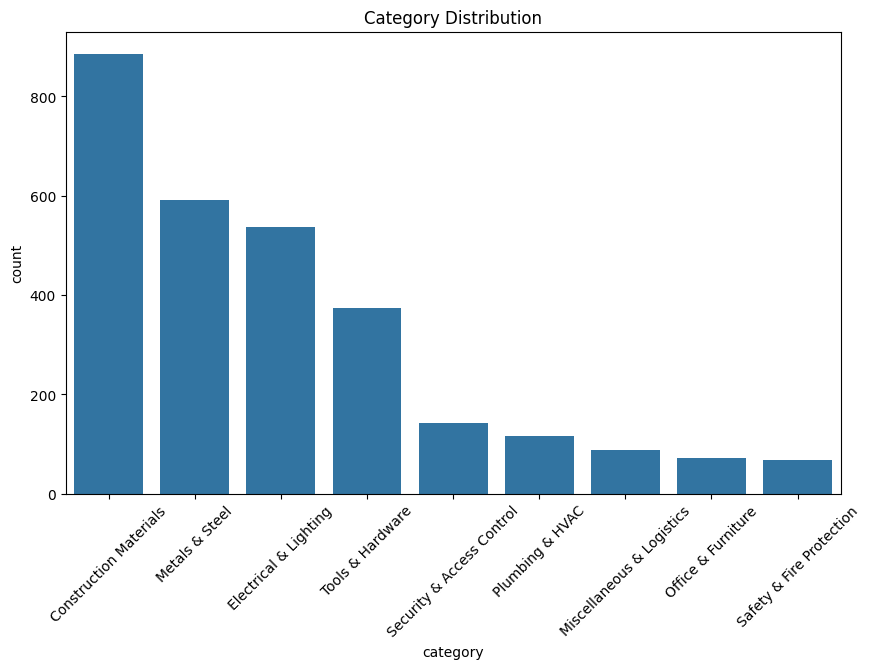

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=insights_df, x='category', order=insights_df['category'].value_counts().index)
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [87]:
insights_df.describe()

,Item ID,Quantity,Sub Total Bcy,Account ID,Normalized Revenue
count,2.872000e+03,2872.000000,2.872000e+03,2.872000e+03,2.872000e+03
mean,3.263831e+18,386.300070,4.699783e+04,3.263831e+18,1.752839e+05
std,7.388684e+06,2104.821543,1.058764e+05,5.120892e+02,3.971970e+05
min,3.263831e+18,0.150000,0.000000e+00,3.263831e+18,0.000000e+00
25%,3.263831e+18,6.000000,1.771450e+03,3.263831e+18,6.141516e+03
50%,3.263831e+18,30.000000,1.012024e+04,3.263831e+18,3.721500e+04
75%,3.263831e+18,120.000000,5.000000e+04,3.263831e+18,1.861031e+05
max,3.263831e+18,51150.000000,1.519000e+06,3.263831e+18,5.696250e+06


In [92]:
insights_df.groupby('category')['Quantity'].sum().reset_index()

,category,Quantity
0,Construction Materials,315085.0
1,Electrical & Lighting,169423.0
2,Metals & Steel,189369.0
3,Miscellaneous & Logistics,41811.0
4,Office & Furniture,88752.0
5,Plumbing & HVAC,43763.0
6,Safety & Fire Protection,63915.0
7,Security & Access Control,6041.0
8,Tools & Hardware,191298.0


The category we sell the most is: Construction Materials with 315085.0 items sold.


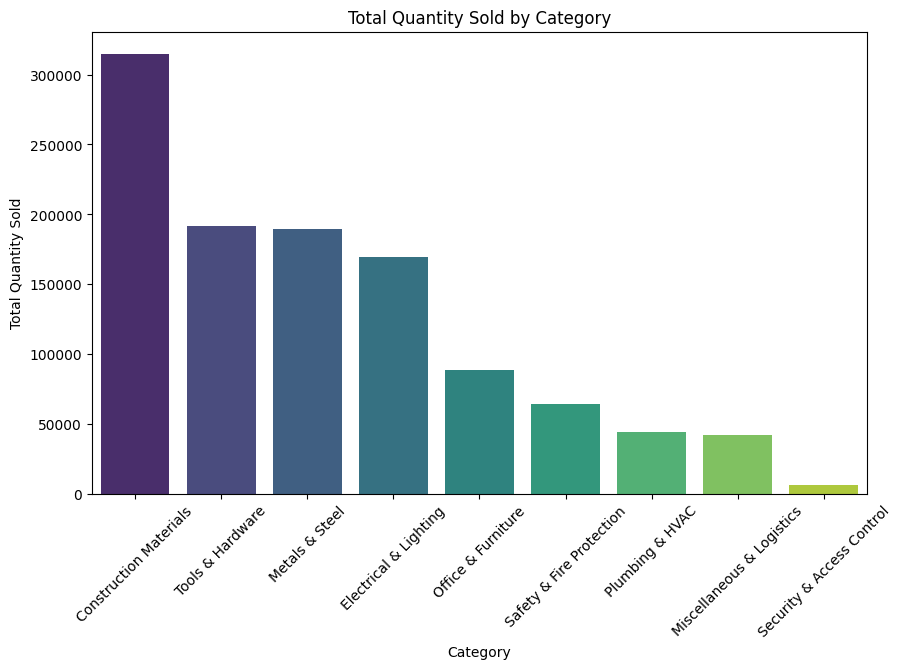

In [96]:
category_sales = insights_df.groupby('category')['Quantity'].sum().reset_index()

# Sort the categories by total quantity sold in descending order
category_sales = category_sales.sort_values(by='Quantity', ascending=False)

# Display the category with the highest sales
top_category = category_sales.iloc[0]
print(f"The category we sell the most is: {top_category['category']} with {top_category['Quantity']} items sold.")

# Plot the histogram of category sales
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='category', y='Quantity', palette='viridis')
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

The category we get the most money from is: Metals & Steel with 182504371.7475 in revenue.


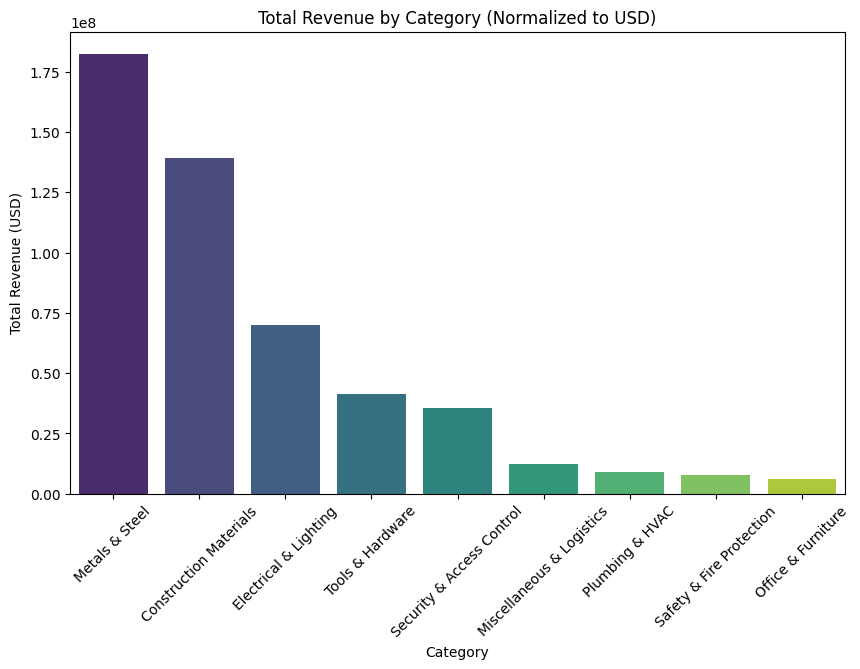

In [97]:
# Define exchange rates
exchange_rates = {
    'USD': 1,
    'SAR': 3.75
}

# Normalize revenue to USD
insights_df['Normalized Revenue'] = insights_df.apply(
    lambda row: row['Sub Total Bcy'] if row['Currency Code'] == 'USD' else row['Sub Total Bcy'] * exchange_rates[row['Currency Code']], axis=1
)

# Group by category and sum the normalized revenues
category_revenue = insights_df.groupby('category')['Normalized Revenue'].sum().reset_index()

# Sort the categories by total normalized revenue in descending order
category_revenue = category_revenue.sort_values(by='Normalized Revenue', ascending=False)

# Display the category with the highest revenue
top_revenue_category = category_revenue.iloc[0]
print(f"The category we get the most money from is: {top_revenue_category['category']} with {top_revenue_category['Normalized Revenue']} in revenue.")

# Plot the histogram of category revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='category', y='Normalized Revenue', palette='viridis')
plt.title('Total Revenue by Category (Normalized to USD)')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

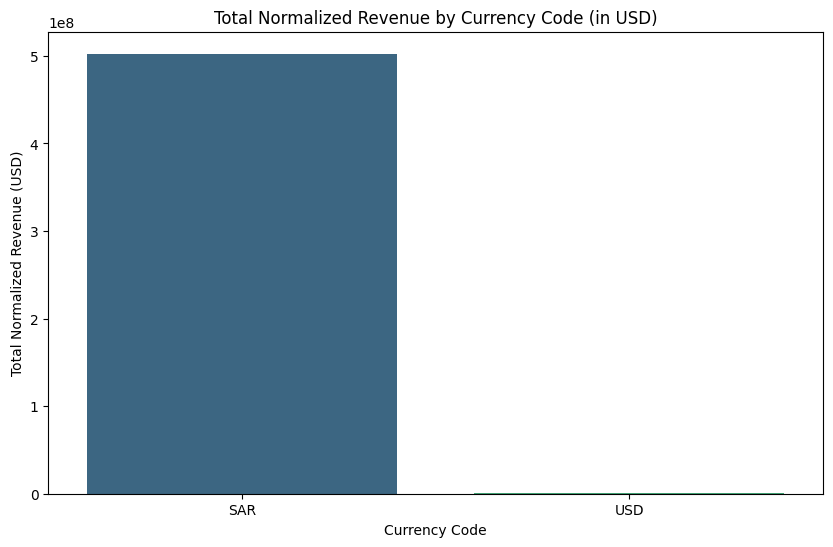

In [79]:
# Group by currency code and sum the normalized revenues
currency_revenue_normalized = insights_df.groupby('Currency Code')['Normalized Revenue'].sum().reset_index()

# Sort the categories by total normalized revenue in descending order
currency_revenue_normalized = currency_revenue_normalized.sort_values(by='Normalized Revenue', ascending=False)

# Plot the normalized revenue by currency code
plt.figure(figsize=(10, 6))
sns.barplot(data=currency_revenue_normalized, x='Currency Code', y='Normalized Revenue', palette='viridis')
plt.title('Total Normalized Revenue by Currency Code (in USD)')
plt.xlabel('Currency Code')
plt.ylabel('Total Normalized Revenue (USD)')
plt.show()

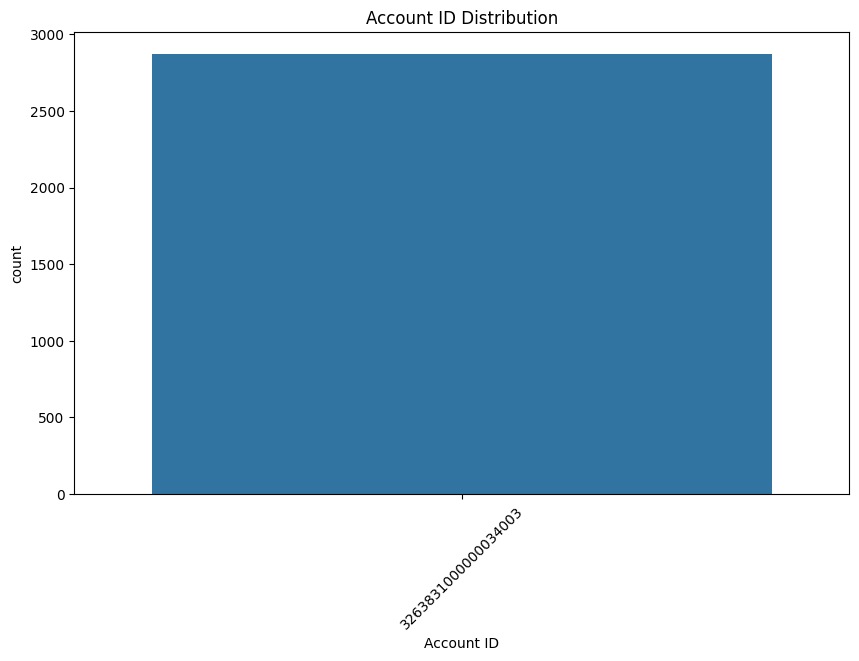

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=insights_df, x='Account ID', order=insights_df['Account ID'].value_counts().index)
plt.title('Account ID Distribution')
plt.xticks(rotation=45)
plt.show()

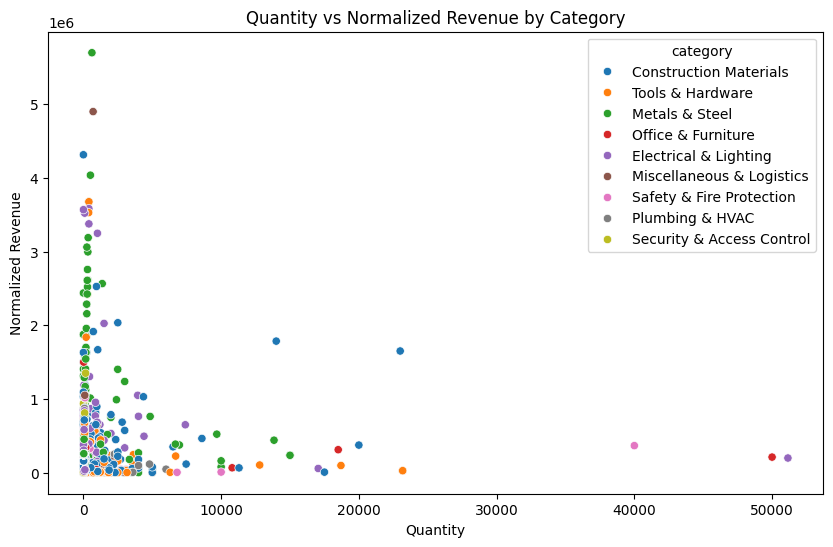

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insights_df, x='Quantity', y='Normalized Revenue', hue='category')
plt.title('Quantity vs Normalized Revenue by Category')
plt.xlabel('Quantity')
plt.ylabel('Normalized Revenue')
plt.show()

# Futrue improvemnts
- translation results are not the best, we may use another package for translation or depend on the multilingial LLM
- add evaluation module for the LLM categorization output 
- we could spend more time exploring different LLMs and try to use smaller optimized model 
- do batch processing instead of single requests
- connect with dashboard in realtime 